<a href="https://colab.research.google.com/github/Krahjotdaan/EMNISTHandwritedCharacters/blob/main/EMNISTHandwritedCharacters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as k
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras import Sequential
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('emnist-balanced-train.csv', header=None)
test = pd.read_csv('emnist-balanced-test.csv', header=None)

In [3]:
train.shape, test.shape

((112800, 785), (18800, 785))

In [4]:
labels = {
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z'}

In [5]:
train = train[train[0].isin(np.arange(10, 36))] # only capital letters

In [6]:
train[0].describe()

count    62400.00000
mean        22.50000
std          7.50006
min         10.00000
25%         16.00000
50%         22.50000
75%         29.00000
max         35.00000
Name: 0, dtype: float64

In [7]:
train.reset_index(inplace=True)
train

,index,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62395,112793,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62396,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62397,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62398,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train = train.loc[:, 1:]
y_train = train.loc[:, 0]

X_train.shape, y_train.shape

((62400, 784), (62400,))

# Reshaping

In [9]:
def flip_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [10]:
X_train = np.apply_along_axis(flip_and_rotate, 1, X_train.values)
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(62400, 28, 28, 1)

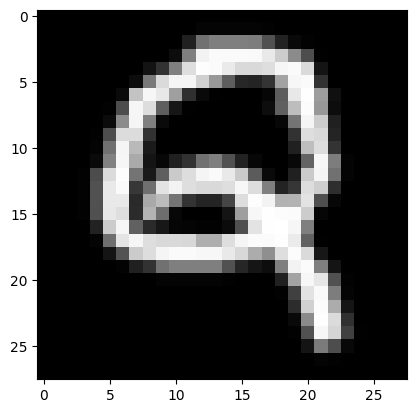

In [11]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [12]:
X_train = X_train.astype('float32') / 255

In [13]:
y_train.nunique()

26

In [14]:
y_train = k.utils.to_categorical(y_train, 36)
y_train.shape

(62400, 36)

# Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train,  y_train, test_size=0.1, random_state=42)

In [39]:
model = Sequential()

model.add(Conv2D(64, (4, 4), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(36, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 28, 28, 64)        1088      
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 64)        65600     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_23 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 64)       

In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=30, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1872/1872 [==============================] - 21s 9ms/step - loss: 0.7218 - accuracy: 0.7834 - val_loss: 0.2723 - val_accuracy: 0.9157
Epoch 2/5
1872/1872 [==============================] - 16s 9ms/step - loss: 0.2792 - accuracy: 0.9152 - val_loss: 0.2100 - val_accuracy: 0.9298
Epoch 3/5
1872/1872 [==============================] - 16s 9ms/step - loss: 0.2281 - accuracy: 0.9309 - val_loss: 0.1755 - val_accuracy: 0.9357
Epoch 4/5
1872/1872 [==============================] - 16s 9ms/step - loss: 0.2022 - accuracy: 0.9359 - val_loss: 0.1685 - val_accuracy: 0.9407
Epoch 5/5
1872/1872 [==============================] - 16s 9ms/step - loss: 0.1865 - accuracy: 0.9410 - val_loss: 0.1497 - val_accuracy: 0.9489


In [41]:
history = model.fit(x=X_train, y=y_train, batch_size=30, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1872/1872 [==============================] - 16s 9ms/step - loss: 0.1710 - accuracy: 0.9447 - val_loss: 0.1525 - val_accuracy: 0.9458
Epoch 2/5
1872/1872 [==============================] - 16s 9ms/step - loss: 0.1605 - accuracy: 0.9482 - val_loss: 0.1579 - val_accuracy: 0.9434
Epoch 3/5
1872/1872 [==============================] - 16s 8ms/step - loss: 0.1543 - accuracy: 0.9499 - val_loss: 0.1391 - val_accuracy: 0.9495
Epoch 4/5
1872/1872 [==============================] - 16s 9ms/step - loss: 0.1423 - accuracy: 0.9539 - val_loss: 0.1379 - val_accuracy: 0.9513
Epoch 5/5
1872/1872 [==============================] - 16s 9ms/step - loss: 0.1388 - accuracy: 0.9545 - val_loss: 0.1610 - val_accuracy: 0.9465


In [42]:
history = model.fit(x=X_train, y=y_train, batch_size=20, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
2808/2808 [==============================] - 25s 9ms/step - loss: 0.1559 - accuracy: 0.9488 - val_loss: 0.1431 - val_accuracy: 0.9478
Epoch 2/5
2808/2808 [==============================] - 24s 9ms/step - loss: 0.1495 - accuracy: 0.9501 - val_loss: 0.1450 - val_accuracy: 0.9524
Epoch 3/5
2808/2808 [==============================] - 24s 9ms/step - loss: 0.1420 - accuracy: 0.9543 - val_loss: 0.1496 - val_accuracy: 0.9529
Epoch 4/5
2808/2808 [==============================] - 23s 8ms/step - loss: 0.1381 - accuracy: 0.9550 - val_loss: 0.1456 - val_accuracy: 0.9542
Epoch 5/5
2808/2808 [==============================] - 24s 9ms/step - loss: 0.1343 - accuracy: 0.9563 - val_loss: 0.1422 - val_accuracy: 0.9538


In [43]:
history = model.fit(x=X_train, y=y_train, batch_size=30, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1872/1872 [==============================] - 16s 8ms/step - loss: 0.1034 - accuracy: 0.9638 - val_loss: 0.1349 - val_accuracy: 0.9526
Epoch 2/5
1872/1872 [==============================] - 16s 8ms/step - loss: 0.1035 - accuracy: 0.9646 - val_loss: 0.1348 - val_accuracy: 0.9551
Epoch 3/5
1872/1872 [==============================] - 16s 8ms/step - loss: 0.1029 - accuracy: 0.9646 - val_loss: 0.1375 - val_accuracy: 0.9556
Epoch 4/5
1872/1872 [==============================] - 16s 8ms/step - loss: 0.1002 - accuracy: 0.9652 - val_loss: 0.1427 - val_accuracy: 0.9530
Epoch 5/5
1872/1872 [==============================] - 16s 9ms/step - loss: 0.0942 - accuracy: 0.9675 - val_loss: 0.1516 - val_accuracy: 0.9537


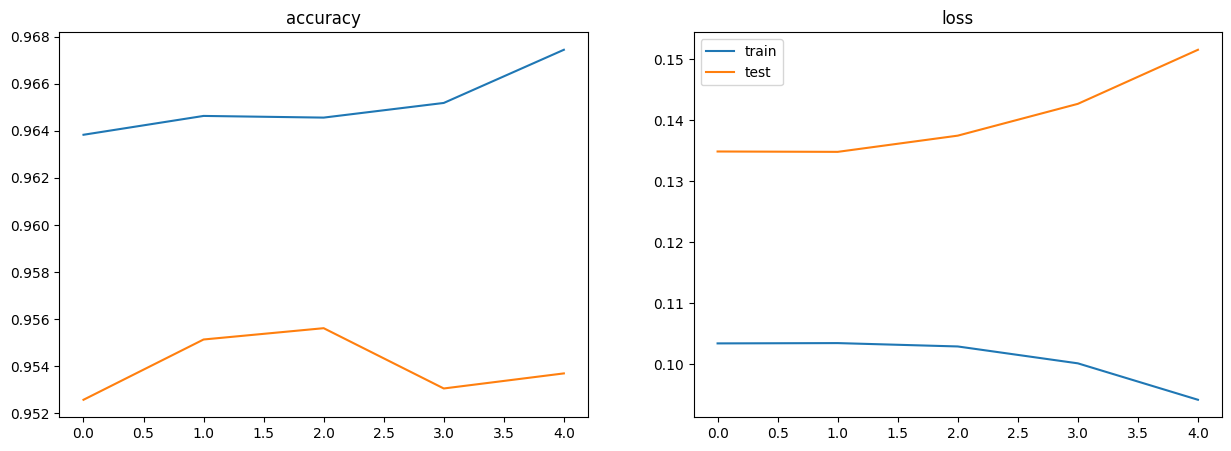

In [44]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()